In [6]:
from data_generator import DataGenerator
import cv2
import os
import tensorflow as tf
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import TensorBoard, ModelCheckpoint
from tensorflow.keras.preprocessing import image
import numpy as np
import matplotlib.image  as mpimg
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
DataGenerator().copy_data_to_dest()

print(len(os.listdir('data/face-mask/train/with_mask')))
print(len(os.listdir('data/face-mask/test/with_mask')))
print(len(os.listdir('data/face-mask/train/without_mask')))


552
138
548


In [3]:
model = tf.keras.models.Sequential([

    tf.keras.layers.Conv2D(100, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2,2),
    
    tf.keras.layers.Conv2D(100, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(50, activation='relu'),
    tf.keras.layers.Dense(2, activation='sigmoid')
])
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc'])

In [4]:
TRAINING_DIR = 'data/face-mask/train/'
train_datagen = ImageDataGenerator(rescale=1.0/255,
                                   rotation_range=40,
                                   width_shift_range=0.2,
                                   height_shift_range=0.2,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True,
                                   fill_mode='nearest')

train_generator = train_datagen.flow_from_directory(TRAINING_DIR, 
                                                    batch_size=10, 
                                                    target_size=(150, 150))

VALIDATION_DIR = 'data/face-mask/test/'
validation_datagen = ImageDataGenerator(rescale=1.0/255)

validation_generator = validation_datagen.flow_from_directory(VALIDATION_DIR, 
                                                         batch_size=10, 
                                                         target_size=(150, 150))
checkpoint = ModelCheckpoint('model-{epoch:03d}.model',monitor='val_loss',verbose=0,save_best_only=True,mode='auto')

Found 1100 images belonging to 2 classes.
Found 276 images belonging to 2 classes.


In [5]:
history = model.fit_generator(train_generator,
                              epochs=30,
                              validation_data=validation_generator,
                              callbacks=[checkpoint])
model.save('my_model.h5')

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/30
110/110 [==============================] - ETA: 0s - loss: 0.6908 - acc: 0.5609WARNING:tensorflow:From S:\Users\sifat\anaconda3\envs\tf-gpu\lib\site-packages\tensorflow\python\ops\resource_variable_ops.py:1817: calling BaseResourceVariable.__init__ (from tensorflow.python.ops.resource_variable_ops) with constraint is deprecated and will be removed in a future version.
Instructions for updating:
If using Keras pass *_constraint arguments to layers.
INFO:tensorflow:Assets written to: model-001.model\assets
110/110 [==============================] - 30s 276ms/step - loss: 0.6908 - acc: 0.5609 - val_loss: 0.3998 - val_acc: 0.8913
Epoch 2/30
110/110 [==============================] - 26s 239ms/step - loss: 0.5281 - acc: 0.7218 - val_loss: 0.6979 - val_acc: 0.5000
Epoch 3/30
110/110 [==============================] - 26s 239ms/step - loss: 0.6946 - acc: 0.4845 - val_loss: 0.6933 - val_acc: 0.5000
Epoch 4/3

Text(0.5, 1.0, 'Training and validation loss')

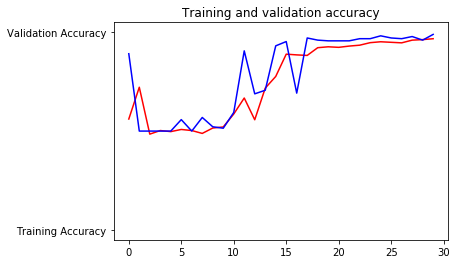

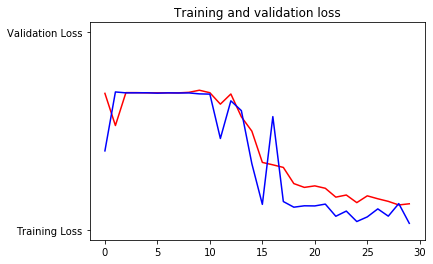

In [6]:
#-----------------------------------------------------------
# Retrieving a list of list results on training and test data
# sets for each training epoch
#-----------------------------------------------------------
acc=history.history['acc']
val_acc=history.history['val_acc']
loss=history.history['loss']
val_loss=history.history['val_loss']

epochs=range(len(acc)) 

#------------------------------------------------
# Plotting training and validation accuracy per epoch
#------------------------------------------------
plt.plot(epochs, acc, 'r', "Training Accuracy")
plt.plot(epochs, val_acc, 'b', "Validation Accuracy")
plt.title('Training and validation accuracy')
plt.figure()

#------------------------------------------------
# Plotting training and validation loss per epoch
#------------------------------------------------
plt.plot(epochs, loss, 'r', "Training Loss")
plt.plot(epochs, val_loss, 'b', "Validation Loss")


plt.title('Training and validation loss')


In [3]:
#model validation

new_model = tf.keras.models.load_model('my_model.h5')
new_model.summary()

path = 'data/validation/with_mask.jpg'
img=image.load_img(path, target_size=(150, 150))
x=image.img_to_array(img)
print(x.shape)
x=np.expand_dims(x, axis=0)
print(x.shape)
images = np.vstack([x])
classes = new_model.predict(images, batch_size=10)

print(classes[0])

if classes[0][0]:
    print(" is a with mask")

else:
    print(" is a without mask")

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 100)     2800      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 100)       0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 100)       90100     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 100)       0         
_________________________________________________________________
flatten (Flatten)            (None, 129600)            0         
_________________________________________________________________
dropout (Dropout)            (None, 129600)            0         
_________________________________________________________________
dense (Dense)                (None, 50)                6